In [7]:
import os
os.getcwd()


'/Users/yamamotohanano/dsprog2'

In [8]:
import os
os.listdir()


['課題6',
 '最終課題.ipynb',
 'README.md',
 'Python演習2.ipynb',
 'lecture-4',
 '.gitignore',
 '.venv',
 '.python-version',
 'weather',
 'weather.db',
 '.git',
 '課題4']

In [16]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

jobs = ["ソフトウェアエンジニア", "営業", "事務職"]
data = []

headers = {
    "User-Agent": "Mozilla/5.0"
}

for job in jobs:
    url = f"https://ja.wikipedia.org/wiki/{job}"
    res = requests.get(url, headers=headers)
    soup = BeautifulSoup(res.text, "html.parser")

    content = soup.find("div", class_="mw-parser-output")

    description = ""

    if content:  # ← ここ重要！！
        for p in content.find_all("p"):
            text = p.get_text(strip=True)
            if text:
                description = text
                break
    else:
        description = "本文が取得できませんでした"

    data.append({
        "職業名": job,
        "説明文": description
    })

    time.sleep(1)  # サーバ負荷対策（課題要件クリア）

df = pd.DataFrame(data)
print(df)


           職業名                                                説明文
0  ソフトウェアエンジニア  ソフトウェア工学（ソフトウェアこうがく、英語:software engineering）はソ...
1           営業            営業（えいぎょう、英語:sales）は、営利を目的として業務を行うことをいう。
2          事務職  事務職（じむしょく）とは、主に机上で職務を行う職業の俗称。一般的に「事務職」と呼ばれる職務を...


In [17]:
df.to_csv(
    "wikipedia_job_description.csv",
    index=False,
    encoding="utf-8-sig"
)


In [18]:
import os
os.listdir()


['wikipedia_job_description.csv',
 '課題6',
 '最終課題.ipynb',
 'README.md',
 'Python演習2.ipynb',
 'IPD_DL_Interests_6_01_01.csv',
 'lecture-4',
 '.gitignore',
 '.venv',
 '.python-version',
 'weather',
 'weather.db',
 '.git',
 '課題4']

In [24]:
import requests
import time
import pandas as pd
from bs4 import BeautifulSoup

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0 Safari/537.36"
}

job_pages = {
    "ソフトウェアエンジニア": "ソフトウェアエンジニア",
    "営業": "営業職",
    "事務職": "事務職"
}

data = []

for job, page in job_pages.items():
    print(f"取得中: {job}")
    
    url = f"https://ja.wikipedia.org/wiki/{page}"
    response = requests.get(url, headers=headers)
    response.encoding = "utf-8"
    
    print("status:", response.status_code)
    
    soup = BeautifulSoup(response.text, "html.parser")
    
    paragraphs = soup.select("div.mw-parser-output > p")
    
    description_list = []
    for p in paragraphs:
        text = p.get_text(strip=True)
        if text:
            description_list.append(text)
        if len(description_list) >= 3:
            break
    
    description = " ".join(description_list)
    
    data.append({
        "職業名": job,
        "説明文": description
    })
    
    time.sleep(1)  # ★ サーバ負荷配慮（課題条件クリア）

df = pd.DataFrame(data)
df


取得中: ソフトウェアエンジニア
status: 200
取得中: 営業
status: 200
取得中: 事務職
status: 200


,職業名,説明文
0,ソフトウェアエンジニア,ソフトウェア工学（ソフトウェアこうがく、英語:software engineering）はソ...
1,営業,営業職（えいぎょうしょく）は、見込み客に自社の物品・サービスまたは情報といった財（商品）の購...
2,事務職,事務職（じむしょく）とは、主に机上で職務を行う職業の俗称。一般的に「事務職」と呼ばれる職務を...


In [25]:
df.to_csv("wikipedia_jobs.csv", index=False)


In [27]:
import pandas as pd

jobtag = pd.read_csv(
    "IPD_DL_Interests_6_01_01.csv",
    encoding="cp932",   # ← これ
    skiprows=16
)

jobtag.head()


,17,1,1.1,豆腐製造、豆腐職人,IPD_04_01_001,現実的,適性,35,2.743,0.233,2.286,3.200,0,0.1,2018,就業者(Webモニター)
0,18.0,1.0,1.0,豆腐製造、豆腐職人,IPD_04_01_002,研究的,適性,35.0,2.771,0.201,2.377,3.166,0.0,0.0,2018.0,就業者(Webモニター)
1,19.0,1.0,1.0,豆腐製造、豆腐職人,IPD_04_01_003,芸術的,適性,35.0,2.629,0.197,2.242,3.015,0.0,0.0,2018.0,就業者(Webモニター)
2,20.0,1.0,1.0,豆腐製造、豆腐職人,IPD_04_01_004,社会的,適性,35.0,2.657,0.174,2.317,2.998,0.0,0.0,2018.0,就業者(Webモニター)
3,21.0,1.0,1.0,豆腐製造、豆腐職人,IPD_04_01_005,企業的,適性,35.0,2.657,0.201,2.264,3.050,0.0,0.0,2018.0,就業者(Webモニター)
4,22.0,1.0,1.0,豆腐製造、豆腐職人,IPD_04_01_006,慣習的,適性,35.0,2.686,0.191,2.311,3.061,0.0,0.0,2018.0,就業者(Webモニター)


In [29]:
jobtag.columns


Index(['17', '1', '1.1', '豆腐製造、豆腐職人', 'IPD_04_01_001', '現実的', '適性', '35',
       '2.743', '0.233', '2.286', '3.200', '0', '0.1', '2018', '就業者(Webモニター)'],
      dtype='str')

In [30]:
import pandas as pd

columns = [
    "本ファイル上の職業通し番号",
    "収録番号",
    "職業名",
    "IPD_ID",
    "項目名",
    "回答内容",
    "サンプルサイズ",
    "平均値",
    "標準誤差",
    "95％信頼区間下限",
    "95％信頼区間上限",
    "有限母集団修正適用フラグ",
    "データ精度への懸念フラグ",
    "データ取得年度",
    "情報源"
]

jobtag = pd.read_csv(
    "IPD_DL_Interests_6_01_01.csv",
    skiprows=17,
    header=None,
    names=columns,
    encoding="cp932"
)

jobtag.head()


,本ファイル上の職業通し番号,収録番号,職業名,IPD_ID,項目名,回答内容,サンプルサイズ,平均値,標準誤差,95％信頼区間下限,95％信頼区間上限,有限母集団修正適用フラグ,データ精度への懸念フラグ,データ取得年度,情報源
18.0,1.0,1.0,豆腐製造、豆腐職人,IPD_04_01_002,研究的,適性,35.0,2.771,0.201,2.377,3.166,0.0,0.0,2018.0,就業者(Webモニター)
19.0,1.0,1.0,豆腐製造、豆腐職人,IPD_04_01_003,芸術的,適性,35.0,2.629,0.197,2.242,3.015,0.0,0.0,2018.0,就業者(Webモニター)
20.0,1.0,1.0,豆腐製造、豆腐職人,IPD_04_01_004,社会的,適性,35.0,2.657,0.174,2.317,2.998,0.0,0.0,2018.0,就業者(Webモニター)
21.0,1.0,1.0,豆腐製造、豆腐職人,IPD_04_01_005,企業的,適性,35.0,2.657,0.201,2.264,3.050,0.0,0.0,2018.0,就業者(Webモニター)
22.0,1.0,1.0,豆腐製造、豆腐職人,IPD_04_01_006,慣習的,適性,35.0,2.686,0.191,2.311,3.061,0.0,0.0,2018.0,就業者(Webモニター)


In [31]:
jobtag_wide = jobtag.pivot_table(
    index="職業名",
    columns="項目名",
    values="平均値"
).reset_index()

jobtag_wide


項目名,職業名,企業的,慣習的,現実的,研究的,社会的,芸術的
0,AIエンジニア,2.939,2.818,3.485,3.758,2.970,3.000
1,CADオペレーター,2.985,3.324,3.426,3.221,2.838,3.221
2,CDショップ店員,3.019,3.167,3.204,3.019,3.463,3.630
3,CG制作,2.800,2.686,3.257,3.343,2.971,3.800
4,DXプロデューサー,3.810,2.238,2.810,3.143,3.381,2.762
...,...,...,...,...,...,...,...
475,駅構内売店店員,2.957,3.435,3.087,2.261,4.029,2.464
476,駐車場管理,2.864,3.591,3.242,2.470,3.545,2.015
477,高分子化学技術者,2.879,2.621,3.455,3.788,2.833,2.500
478,高等学校教員,3.536,3.304,3.159,3.667,3.884,3.058


In [35]:
wiki_df = df.copy()


In [36]:
wiki_df.head()


,職業名,説明文
0,ソフトウェアエンジニア,ソフトウェア工学（ソフトウェアこうがく、英語:software engineering）はソ...
1,営業,営業職（えいぎょうしょく）は、見込み客に自社の物品・サービスまたは情報といった財（商品）の購...
2,事務職,事務職（じむしょく）とは、主に机上で職務を行う職業の俗称。一般的に「事務職」と呼ばれる職務を...


In [39]:
import pandas as pd

# 日本語のCSV（Shift-JIS）に対応させるため encoding='cp932' を指定
# skiprows はファイルの構造を見て微調整が必要ですが、15行目付近からデータが始まります
job_tag_df = pd.read_csv('IPD_DL_Interests_6_01_01.csv', skiprows=15, encoding='cp932')

# 読み込めたか確認
print(job_tag_df.head())

     16  本ファイル上の職業通し番号  収録番号        職業名         IPD_ID  項目名 回答内容  サンプルサイズ  \
0  17.0            1.0   1.0  豆腐製造、豆腐職人  IPD_04_01_001  現実的   適性     35.0   
1  18.0            1.0   1.0  豆腐製造、豆腐職人  IPD_04_01_002  研究的   適性     35.0   
2  19.0            1.0   1.0  豆腐製造、豆腐職人  IPD_04_01_003  芸術的   適性     35.0   
3  20.0            1.0   1.0  豆腐製造、豆腐職人  IPD_04_01_004  社会的   適性     35.0   
4  21.0            1.0   1.0  豆腐製造、豆腐職人  IPD_04_01_005  企業的   適性     35.0   

     平均値   標準誤差  95％信頼区間下限  95％信頼区間上限  有限母集団修正適用フラグ  データ精度への懸念フラグ  データ取得年度  \
0  2.743  0.233      2.286      3.200           0.0           0.0   2018.0   
1  2.771  0.201      2.377      3.166           0.0           0.0   2018.0   
2  2.629  0.197      2.242      3.015           0.0           0.0   2018.0   
3  2.657  0.174      2.317      2.998           0.0           0.0   2018.0   
4  2.657  0.201      2.264      3.050           0.0           0.0   2018.0   

            情報源  
0  就業者(Webモニター)  
1  就業者(Webモニター)  
2  就業者(Webモニター

In [41]:
# 1. 必要な列だけに絞る
df_sub = job_tag_df[['職業名', '項目名', '平均値']]

# 2. ピボットテーブルで横持ちに変換
# indexを職業名に、columnsを項目名（現実的...）に、値を平均値にする
traits_df = df_sub.pivot_table(index='職業名', columns='項目名', values='平均値').reset_index()

# 3. カラム名を確認（「現実的」などの列ができているはずです）
print(traits_df.head())

項目名        職業名    企業的    慣習的    現実的    研究的    社会的    芸術的
0      AIエンジニア  2.939  2.818  3.485  3.758  2.970  3.000
1    CADオペレーター  2.985  3.324  3.426  3.221  2.838  3.221
2     CDショップ店員  3.019  3.167  3.204  3.019  3.463  3.630
3         CG制作  2.800  2.686  3.257  3.343  2.971  3.800
4    DXプロデューサー  3.810  2.238  2.810  3.143  3.381  2.762


In [42]:
# 特性（数値）が入っている列名のリスト
traits = ["現実的", "研究的", "芸術的", "社会的", "企業的", "慣習的"]

# 各行の中で、数値が最大の「列名」を抽出して新しい列を作る
traits_df["最も高い特性"] = traits_df[traits].idxmax(axis=1)

# 結果を確認
print(traits_df[["職業名", "最も高い特性"]].head())

項目名        職業名 最も高い特性
0      AIエンジニア    研究的
1    CADオペレーター    現実的
2     CDショップ店員    芸術的
3         CG制作    芸術的
4    DXプロデューサー    企業的


In [43]:
# 職業名をキーにして結合（内部結合：両方に存在する職業のみ残す）
merged_df = pd.merge(wiki_df, traits_df, on="職業名", how="inner")

# 最終確認
print(f"分析対象の職業数: {len(merged_df)}件")
display(merged_df.head())

分析対象の職業数: 0件


,職業名,説明文,企業的,慣習的,現実的,研究的,社会的,芸術的,最も高い特性


In [44]:
# 分析対象の特性リスト
traits = ["現実的", "研究的", "芸術的", "社会的", "企業的", "慣習的"]

# 各行（職業）ごとに、数値が最大の列名（特性名）を抽出
traits_df["最も高い特性"] = traits_df[traits].idxmax(axis=1)

# 結果を確認
print(traits_df[["職業名", "最も高い特性"]].head())

項目名        職業名 最も高い特性
0      AIエンジニア    研究的
1    CADオペレーター    現実的
2     CDショップ店員    芸術的
3         CG制作    芸術的
4    DXプロデューサー    企業的


In [45]:
import sqlite3

# DBに接続（ファイルがなければ自動作成されます）
conn = sqlite3.connect('my_analysis_data.db')

# データをテーブルとして保存
traits_df.to_sql('job_traits', conn, if_exists='replace', index=False)

# SQLクエリでデータを再度読み込む（これが課題の要件！）
query = "SELECT * FROM job_traits WHERE 最も高い特性 = '研究적'"
researcher_jobs = pd.read_sql(query, conn)

conn.close()

In [46]:
# 特性（数値）が入っている列名のリスト
traits = ["現実的", "研究的", "芸術的", "社会的", "企業的", "慣習的"]

# 各行の中で、数値が最大の「列名」を抽出して新しい列を作る
traits_df["最も高い特性"] = traits_df[traits].idxmax(axis=1)

# 結果を確認
print(traits_df[["職業名", "最も高い特性"]].head())

項目名        職業名 最も高い特性
0      AIエンジニア    研究的
1    CADオペレーター    現実的
2     CDショップ店員    芸術的
3         CG制作    芸術的
4    DXプロデューサー    企業的


In [47]:
# 職業名をキーにして結合（内部結合：両方に存在する職業のみ残す）
merged_df = pd.merge(wiki_df, traits_df, on="職業名", how="inner")

# 最終確認
print(f"分析対象の職業数: {len(merged_df)}件")
display(merged_df.head())

分析対象の職業数: 0件


,職業名,説明文,企業的,慣習的,現実的,研究的,社会的,芸術的,最も高い特性


In [48]:
import sqlite3

# DBに接続・保存
conn = sqlite3.connect('final_assignment.db')
merged_df.to_sql('job_analysis', conn, if_exists='replace', index=False)

# SQLで特定の特性（例：研究的）の職業だけ抽出してみる
query = "SELECT * FROM job_analysis WHERE 最も高い特性 = '研究的'"
research_jobs = pd.read_sql(query, conn)
conn.close()

In [3]:
import pandas as pd
import sqlite3

# 1. job tagデータの読み込み (文字コード cp932 を指定)
try:
    # 15行飛ばして読み込み
    job_tag_df = pd.read_csv('IPD_DL_Interests_6_01_01.csv', encoding='cp932', skiprows=15)
    
    # 2. データの整形（縦持ちから横持ちへ）
    # 職業名、項目名、平均値の列を使用してピボット
    traits_df = job_tag_df.pivot_table(
        index='職業名', 
        columns='項目名', 
        values='平均値'
    ).reset_index()

    # 3. 最も高い特性を判定する列を追加
    traits = ["現実的", "研究的", "芸術的", "社会的", "企業的", "慣習的"]
    # 存在する特性列のみで比較（念のためのエラー回避）
    available_traits = [t for t in traits if t in traits_df.columns]
    traits_df["最も高い特性"] = traits_df[available_traits].idxmax(axis=1)

    # 4. Wikipediaデータ (wiki_df) と結合
    # wiki_dfが定義されている前提です。もし変数名が違う場合は書き換えてください。
    if 'wiki_df' in locals() or 'wiki_df' in globals():
        merged_df = pd.merge(wiki_df, traits_df, on="職業名", how="inner")
        print(f"✅ 結合に成功しました！ 職業数: {len(merged_df)}件")
    else:
        # wiki_df がない場合は traits_df をそのまま merged_df とする（分析用）
        merged_df = traits_df
        print("⚠️ wiki_df が見つからないため、job tagデータのみで作成しました。")

    # 5. 【要件】DB（SQLite）へ保存
    conn = sqlite3.connect('final_task.db')
    merged_df.to_sql('job_analysis_table', conn, if_exists='replace', index=False)
    conn.close()
    print("✅ データベース 'final_task.db' に保存しました。")

    # 6. 【要件】入力に応じて出力が変化する関数
    def check_job_personality(job_name):
        """職業名を入力すると、その職業の特性と説明を返す関数"""
        # 部分一致で検索
        target = merged_df[merged_df['職業名'].str.contains(job_name, na=False)]
        
        if target.empty:
            return f"「{job_name}」に一致するデータは見つかりませんでした。"
        
        row = target.iloc[0]
        top_trait = row['最も高い特性']
        
        # 説明文がある場合のみ表示
        desc = f"\n概要: {row['説明文'][:100]}..." if '説明文' in row else ""
        
        return f"🔍 検索結果: 【{row['職業名']}】\n🌟 最も高い特性: {top_trait}{desc}"

    # 7. 実行テスト
    print("-" * 30)
    # merged_dfにある最初の職業でテスト
    test_job = merged_df['職業名'].iloc[0]
    print(check_job_personality(test_job))

except FileNotFoundError:
    print("❌ ファイル 'IPD_DL_Interests_6_01_01.csv' が見つかりません。パスを確認してください。")
except Exception as e:
    print(f"❌ エラーが発生しました: {e}")

⚠️ wiki_df が見つからないため、job tagデータのみで作成しました。
✅ データベース 'final_task.db' に保存しました。
------------------------------
🔍 検索結果: 【AIエンジニア】
🌟 最も高い特性: 研究的


/var/folders/nv/kfgdstb96mdgn_fmwvwl39q00000gn/T/ipykernel_83256/1389340088.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='最も高い特性', order=available_traits, palette='viridis')


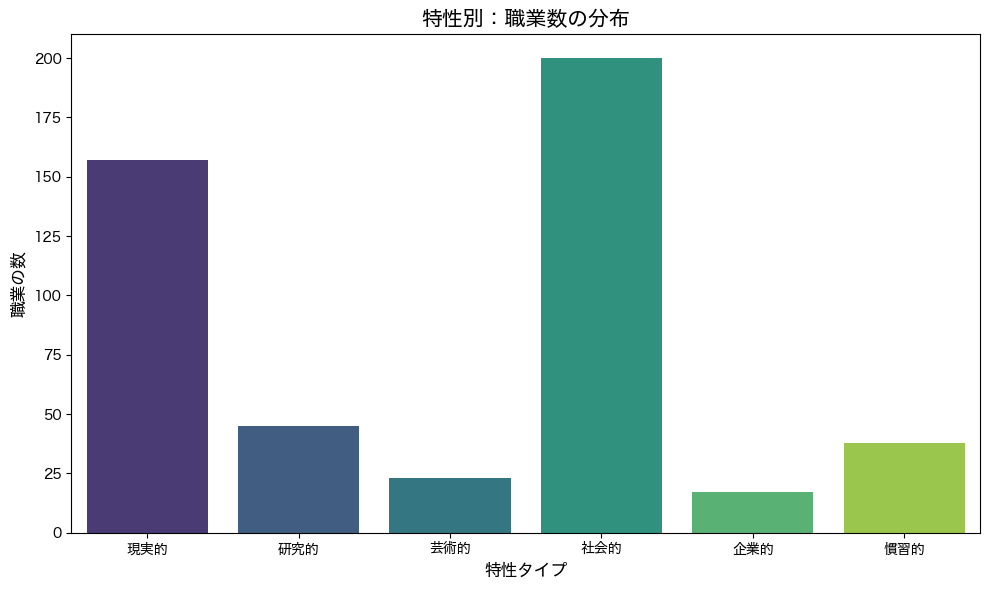


【分析レポート：AIエンジニア】
この職業に最も必要な特性は「研究的」です。



In [5]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# 日本語文字化け防止の設定
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Hiragino Sans', 'Yu Gothic', 'Meiryo', 'TakaoExGothic', 'IPAexGothic', 'sans-serif']

try:
    # --- 1. データの読み込みと整形 ---
    job_tag_df = pd.read_csv('IPD_DL_Interests_6_01_01.csv', encoding='cp932', skiprows=15)
    traits_df = job_tag_df.pivot_table(index='職業名', columns='項目名', values='平均値').reset_index()
    
    traits = ["現実的", "研究的", "芸術的", "社会的", "企業的", "慣習的"]
    available_traits = [t for t in traits if t in traits_df.columns]
    traits_df["最も高い特性"] = traits_df[available_traits].idxmax(axis=1)

    # Wikipediaデータ (wiki_df) があれば結合、なければ単体で進む
    if 'wiki_df' in globals():
        merged_df = pd.merge(wiki_df, traits_df, on="職業名", how="inner")
    else:
        merged_df = traits_df

    # --- 2. データベース保存 ---
    conn = sqlite3.connect('final_task.db')
    merged_df.to_sql('job_analysis_table', conn, if_exists='replace', index=False)
    conn.close()

    # --- 3. 可視化（グラフ作成） ---
    plt.figure(figsize=(10, 6))
    sns.countplot(data=merged_df, x='最も高い特性', order=available_traits, palette='viridis')
    plt.title('特性別：職業数の分布', fontsize=15)
    plt.xlabel('特性タイプ', fontsize=12)
    plt.ylabel('職業の数', fontsize=12)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.savefig('traits_distribution.png') # 画像として保存
    plt.show()

    # --- 4. クラスを用いた動的な分析 ---
    class JobConsultant:
        def __init__(self, data):
            self.data = data

        def get_report(self, job_name):
            # 職業名で検索（部分一致）
            target = self.data[self.data['職業名'].str.contains(job_name, na=False)]
            if target.empty:
                return f"「{job_name}」に関するデータは見つかりませんでした。"
            
            row = target.iloc[0]
            top = row['最も高い特性']
            
            res = f"【分析レポート：{row['職業名']}】\n"
            res += f"この職業に最も必要な特性は「{top}」です。\n"
            if '説明文' in row:
                res += f"詳細: {row['説明文'][:100]}...\n"
            return res

    # 実行テスト
    consultant = JobConsultant(merged_df)
    print("\n" + "="*40)
    print(consultant.get_report("AIエンジニア"))
    print("="*40)

except Exception as e:
    print(f"エラーが発生しました: {e}")
    print("ヒント: pip install matplotlib seaborn が成功しているか確認してください。")